In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
color_list =["#3eb991","#e9a820","#e01563","#edb196","#6ecadc","#1f94ac","#ae9a6a","#ccb8a6","#343a44"]


# Graphing definition

In [17]:
def graph_df(data_frame:pd.DataFrame,begin_index=0,end_index=None):
    if end_index:
        column_name =list(data_frame.columns )[begin_index:end_index]
    else:
        column_name =list(data_frame.columns )[begin_index:]
    fig, ax = plt.subplots()
    x = np.arange(0, len(data_frame), step=1)

    for i in range(len(column_name)):
        label = column_name[i]
        #ax.scatter(x,test_output[label],color = color_list[i])
        ax.plot(x,data_frame[label],color = color_list[i])
        
    colorlist = zip(column_name,color_list)
    handles = [mpatches.Patch(color=colour, label=column_name) for label, colour in colorlist]
    t = ",".join(column_name)
    plt.legend(handles, column_name, ncol=1, bbox_to_anchor=(1, 1))
    plt.plot()
    ax.set_title(t)
    plt.tight_layout()

# Graphing Propogation

In [18]:
#propogate_ap_df = pd.DataFrame(pd.read_csv("../data_files/propogate_output.csv"))
#display(propogate_ap_df)
#graph_df(propogate_ap_df,1,len(propogate_ap_df))

# Graph reduction

,V0
0,0.000000e+00
1,0.000000e+00
2,0.000000e+00
3,0.000000e+00
4,0.000000e+00
...,...
496,-4.947030e-08
497,-4.633660e-08
498,-4.234890e-08
499,-4.279410e-08


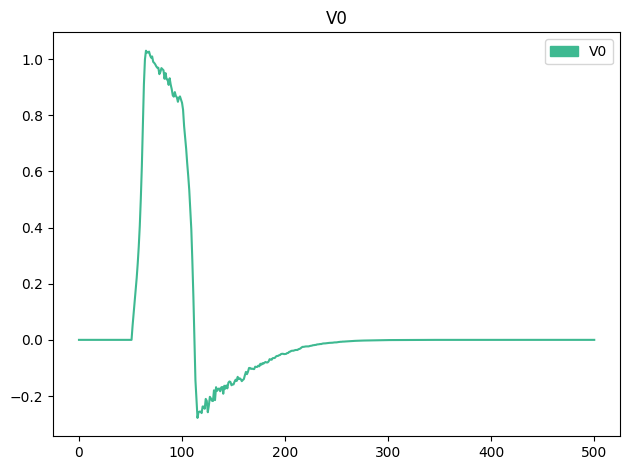

In [19]:
reduce_df = pd.DataFrame(pd.read_csv("../data_files/reduced_stochastic_V_output.csv"))
display(reduce_df)
graph_df(reduce_df)##if u want to graph the full graph u have to do this

# Graph nullcline ( with tiny_N)

In [20]:
def graph_null(data_frame:pd.DataFrame,var_name,begin_x,end_x,step):
    column_name =[var_name]
    fig, ax = plt.subplots()
    x = np.arange(begin_x, end_x, step=step)

    for i in range(len(column_name)):
        label = column_name[i]
        #ax.scatter(x,test_output[label],color = color_list[i])
        y = data_frame[label].dropna() 
        ax.plot(x,y,color = color_list[i])
        
    colorlist = zip(column_name,color_list)
    handles = [mpatches.Patch(color=colour, label=column_name) for label, colour in colorlist]
    t = ",".join(column_name)
    plt.legend(handles, column_name, ncol=1, bbox_to_anchor=(1, 1))
    plt.plot()
    ax.set_title(t)
    plt.tight_layout()

In [21]:
null_df = pd.DataFrame(pd.read_csv("../data_files/reduced_null_output.csv"))
display(null_df)

FileNotFoundError: [Errno 2] No such file or directory: '../data_files/reduced_null_output.csv'

6002


ValueError: x and y must have same first dimension, but have shapes (14002,) and (6002,)

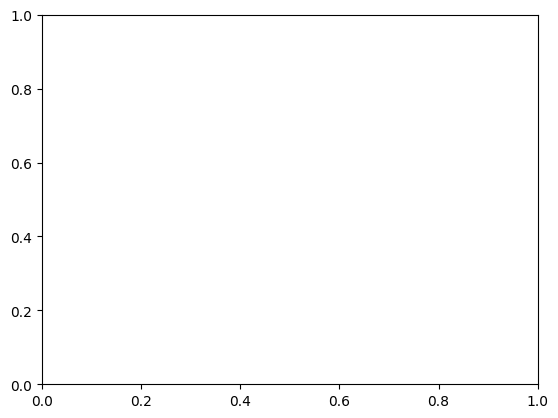

In [ ]:
fig, ax = plt.subplots()
x1 = np.arange(-0.3,1.1002,step=0.0001)

label= column_name= ["N","V","tiny_N"]
y1 = null_df["N"].dropna()
print(len(y1))
ax.plot(x1,y1,color = color_list[0])## graphed the N plot

x2 =  null_df["V"].dropna()
y2=  np.arange(-0.05,0.15+0.0001,step=0.0001)
ax.plot(x2,y2,color = color_list[1])## graphed the V plot


"""x3 = np.arange( -0.3,0.5+0.000002,step=0.000001)
y3 = null_df["tiny_N"].dropna()"""
ax.plot(x3,y3,color = color_list[2])## graphed the V plot

colorlist = zip(column_name,color_list)
handles = [mpatches.Patch(color=colour, label=column_name) for label, colour in colorlist]
t = ",".join(column_name)
plt.legend(handles, column_name, ncol=1, bbox_to_anchor=(1, 1))
plt.plot()
ax.set_title(t)
plt.tight_layout()

# Graph nullcline 

In [ ]:
null_df = pd.DataFrame(pd.read_csv("../data_files/reduced_null_output.csv"))
#display(null_df)

In [ ]:
fig, ax = plt.subplots()
x1 = np.arange(-0.15,0.4502,step=0.0001)

label= column_name= ["N","V","dn/dt_zero","dv/dt_zero"]
y1 = null_df["N"].dropna()
print(len(y1))
ax.plot(x1,y1,color = color_list[0])## graphed the N plot

x2 =  null_df["V"].dropna()
y2=  np.arange(-0.05,0.12+0.0001,step=0.0001)
ax.plot(x2,y2,color = color_list[1])## graphed the V plot

x3 =  null_df["V_dn_0"].dropna()
y3 = null_df["N_dn_0"].dropna()

y3_pred = np.polyfit(x3, y3, deg=3)
ax.plot(x3,np.polyval(y3_pred, x3),color = color_list[2]) 

x4 =  null_df["V_dv_0"].dropna()
y4 = null_df["N_dv_0"].dropna()
y4_pred =  np.polyfit(x4, y4, deg=3)
ax.plot(x4,np.polyval(y4_pred, x4),color = color_list[3]) 

x5 = null_df["Vdt"].dropna().to_numpy() 
y5 =  null_df["Ndt"].dropna().to_numpy()

x6 = null_df["V_x_dt"].dropna().to_numpy() 
y6 =  null_df["N_y_dt"].dropna().to_numpy()

u = -x5/np.sqrt(x5**2 + y5**2)
v = -y5/np.sqrt(x5**2 + y5**2)

plt.quiver(x6,y6,u,v)

colorlist = zip(column_name,color_list)
handles = [mpatches.Patch(color=colour, label=column_name) for label, colour in colorlist]
t = ",".join(column_name)
plt.legend(handles, column_name, ncol=1, bbox_to_anchor=(1, 1))
plt.plot()
ax.set_title(t)
plt.tight_layout()

In [ ]:
fig, ax = plt.subplots()
x3 = null_df["V_dv_0"].dropna().to_numpy() 
y3 =  null_df["N_dv_0"].dropna().to_numpy()

y3_pred = np.polyfit(x3, y3, deg=3)
ax.plot(x3,np.polyval(y3_pred, x3),color = color_list[3], label='dv/dt=0') 
#ax.plot(x3,y3,color = color_list[2],label='og graph')## graphed the V plot

x5 = null_df["Vdt"].dropna().to_numpy() 
y5 =  null_df["Ndt"].dropna().to_numpy()

x6 = null_df["V_x_dt"].dropna().to_numpy() 
y6 =  null_df["N_y_dt"].dropna().to_numpy()

u = x5/np.sqrt(x5**2 + y5**2)
v = y5/np.sqrt(x5**2 + y5**2)

plt.quiver(x6,y6,u,v)

ax.legend()
plt.plot()
plt.tight_layout()